
Alfred Hofmann alfredh2 Daniel Lobo dclobo2 Aryan Shah aryans5

In [ ]:
# imports
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
import networkx as nx


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Task 3

##### Reading in dataset

In [ ]:
# reading in csv
df = pd.read_csv("mp1_av_disengagements.csv")
# first 5 rows
df.head(5)

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


#### Question 1

##### a)

We can treat the occcurance of a disngagement in a mile with a Bernoulii distribution where every mile is a "trial", and a disengagement as a "success".

#### b)

In [ ]:
#assumptions
clear = .72
cloudy = 1 - clear
miles = 505229

In [ ]:
# estimating number of miles driven in clear weather
clear_miles = miles * clear
# estimating number of miles driven in cloudy weather
cloudy_miles = miles * cloudy
# number of disengagements in clear weather
clear_n = len(df[df["Weather"] == "clear"])
# number of disengagements in cloudy weather
cloudy_n = len(df[df["Weather"] == "cloudy"])

In [ ]:
# probability of disengagement in cloudy
p_cloudy = cloudy_n / cloudy_miles
print("The probability of disengagment per mile on a cloudy day is", p_cloudy)

The probability of disengagment per mile on a cloudy day is 0.005902556775527249


##### c)

In [ ]:
# probability of disengagement in clear
p_clear = clear_n / clear_miles
print("The probability of disengagment per mile on a clear day is", p_clear)

The probability of disengagment per mile on a clear day is 0.0005195663748517998


##### d)

In [ ]:
# filtering for only automatic disengagements
clear_auto_n = len(df[(df["Weather"] == "clear") & (df["TypeOfTrigger"] == "automatic")])
cloudy_auto_n = len(df[(df["Weather"] == "cloudy") & (df["TypeOfTrigger"] == "automatic")])

In [ ]:
p_cloudy_auto = cloudy_auto_n / cloudy_miles
print("The probability of automatic disengagment per mile on a cloudy day is", p_cloudy_auto)

The probability of automatic disengagment per mile on a cloudy day is 0.0028063653172267283


##### e)

In [ ]:
p_clear_auto = clear_auto_n / clear_miles
print("The probability of automatic disengagment per mile on a clear day is", p_clear_auto)

The probability of automatic disengagment per mile on a clear day is 0.00026390673008345393


##### f)

In [ ]:
# using CLT, mean of normal approx is n * mean of bernoulli distribution (p)
mean = 10000 * p_cloudy
# using CLT, variance of normal approx is n * variance of bernoulli distribution (p * (1-p)), so sd is...
sd = np.sqrt(10000 * p_cloudy * (1 - p_cloudy))
# calculating z score
z = (100 - mean) / sd
# using norm cdf for probability of greater than...
print("The probability of 100 or more disengagements in 10000 miles in cloudy conditions is", 1 - norm.cdf(z))

The probability of 100 or more disengagements in 10000 miles in cloudy conditions is 4.420337695876242e-08


#### Question 2

##### a)

This distribution follows an exponential distribution. The exponential distribution can be used to descrbibe events in a Poisson process, partricualry the amount of a certain measurement until a specific event occurs. In this case, the measurment is miles and event is a disengagement. The exponential distirubtion contains one rate parameter, which in this case would be the number of disengagements per mile.

In [ ]:
exp_lambda = cloudy_n / cloudy_miles
print("The rate parameter is", exp_lambda)

The rate parameter is 0.005902556775527249


##### b)

This is a binoimal distribution, dexcribed by two parameters, n (number of trials), and p (probability of success)

In [ ]:
print("n is", 10000)
print("p is", p_cloudy)

n is 10000
p is 0.005902556775527249


##### c)

This approximtes a Poisson distribution, described by its rate paramater. In this scenario, the parameter represents the expected number in disengagemtns of 10,000 miles, and the distirubtion models the probability of a certain number of disengagemnts over the 10,000 miles.

In [ ]:
print("The rate parameter is", 10000 * p_cloudy)

The rate parameter is 59.02556775527249


##### d)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


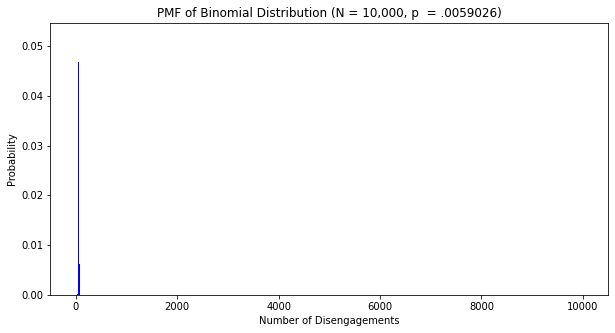

In [ ]:
probs = binom.pmf(np.arange(0, 10001), 10000, p_cloudy)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(0, 10001), probs, color='blue')
plt.title("PMF of Binomial Distribution (N = 10,000, p  = .0059026)")
plt.xlabel("Number of Disengagements")
plt.ylabel("Probability")
plt.show()

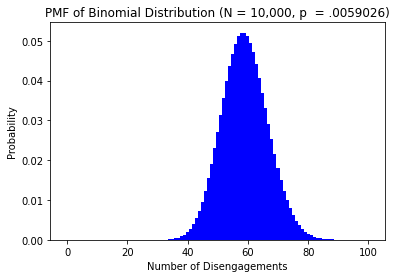

In [ ]:
probs = binom.pmf(np.arange(0, 101), 10000, p_cloudy)
plt.bar(np.arange(0, 101), probs, color='blue', width=1.0)
plt.title("PMF of Binomial Distribution (N = 10,000, p  = .0059026)")
plt.xlabel("Number of Disengagements")
plt.ylabel("Probability")
plt.show()

##### e)

In [ ]:
poisson_lambda = 10000 * p_cloudy
prob = 1 - poisson.cdf(100, poisson_lambda)
print("The probability of 100 or more disengagements in 10000 miles in cloudy conditions using a poisson approx is", prob)

The probability of 100 or more disengagements in 10000 miles in cloudy conditions using a poisson approx is 4.308829278931725e-07


The probabilities are very similar, both are very close to 0.

##### Question 3

##### a)

In [ ]:
cloudy_times = df[(df["Weather"] == "cloudy") & (df["TypeOfTrigger"] == "automatic")]["ReactionTime"]
# divide number of rows with reaction time greater than .4 by the total number of rows
cloudy_slow = (cloudy_times > .4).sum() / len(cloudy_times)
print("The probability of a reaction time greater than 0.4s given cloudy weather is",cloudy_slow)

The probability of a reaction time greater than 0.4s given cloudy weather is 0.6120906801007556


##### b)

In [ ]:
clear_times = df[(df["Weather"] == "clear") & (df["TypeOfTrigger"] == "automatic")]["ReactionTime"]
# divide number of rows with reaction time greater than .7 by the total number of rows
clear_slow = (clear_times > .7).sum() / len(clear_times)
print("The probability of a reaction time greater than 0.7s given clear weather is",clear_slow)

The probability of a reaction time greater than 0.7s given clear weather is 0.3854166666666667


##### Question 4

In [ ]:
# probability of accident per mile in cloudy and clear
accident_cloudy = cloudy_slow * p_cloudy_auto
accident_clear = clear_slow * p_clear_auto
# total probability of accident per mile
accident = accident_cloudy * cloudy + accident_clear * clear
print("The probability of accident per mile is", accident)

The probability of accident per mile is 0.0005542041331752531


##### Question 5

##### a)

In [ ]:
filtered = df[(df["Weather"] == "cloudy") & (df["TypeOfTrigger"] == "automatic") & (df["ReactionTime"] > 0.4)]
posterior_froze_cloudy = (filtered["Cause"] == "Software Froze").sum() / len(filtered)
print("The posterior probability that the root cause is Software Froze with a cloudy reaction time greater than .4 is", posterior_froze_cloudy)

The posterior probability that the root cause is Software Froze with a cloudy reaction time greater than .4 is 0.053497942386831275


##### b)

In [ ]:
filtered = df[(df["Weather"] == "clear") & (df["TypeOfTrigger"] == "automatic") & (df["ReactionTime"] > 0.7)]
posterior_froze_clear = (filtered["Cause"] == "Software Froze").sum() / len(filtered)
print("The posterior probability that the root cause is Software Froze with a clear reaction time greater than .7 is", posterior_froze_clear)

The posterior probability that the root cause is Software Froze with a clear reaction time greater than .7 is 0.24324324324324326


It looks like that software forze is more likely to be a cause of a disengagemtn with a slow reaction time in clear weather.

#### Problem 6

##### a)

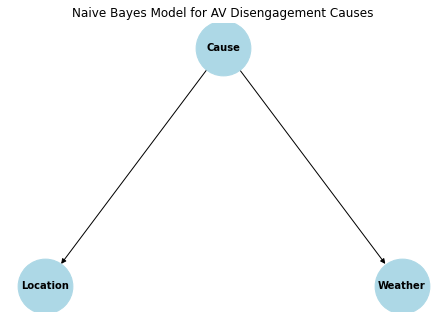

In [ ]:


G = nx.DiGraph()


G.add_node("Cause")
G.add_node("Location")
G.add_node("Weather")

G.add_edges_from([
    ("Cause", "Location"),
    ("Cause", "Weather")
])


pos = {
    "Cause": (0, 1),
    "Location": (-1, 0),
    "Weather": (1, 0)
}


nx.draw(G, pos, with_labels=True, arrows=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Naive Bayes Model for AV Disengagement Causes")
plt.show()

#### b)

For Cause its (3-1) parameters, for Location given Cause its (2-1) * 3 parameters, and for Weather given Cause its (2-1) * 3 parameters, so 8 total parameters.

##### c)

In [ ]:
df['Cause_2'] = df['Cause'].apply(lambda x: x if x in ['Software Froze', 'Hardware Fault'] else 'Other')

In [ ]:
cause_counts = df['Cause_2'].value_counts()
total_cases = len(df)
prior_probabilities_cause = cause_counts / total_cases

In [ ]:
priors = pd.DataFrame(prior_probabilities_cause)
priors.columns = ["Prior Probability"]
priors

,Prior Probability
Other,0.802734
Hardware Fault,0.101562
Software Froze,0.095703


In [ ]:
location_counts = df.groupby(['Cause_2', 'Location']).size().unstack(fill_value=0)
conditional_prob_location = location_counts.div(location_counts.sum(axis=1), axis=0)
conditional_prob_location.columns.name = None
conditional_prob_location.index.name = None
conditional_prob_location

,highway,urban-street
Hardware Fault,0.086538,0.913462
Other,0.006083,0.993917
Software Froze,0.061224,0.938776


In [ ]:
weather_counts = df.groupby(['Cause_2', 'Weather']).size().unstack(fill_value=0)
conditional_prob_weather = weather_counts.div(weather_counts.sum(axis=1), axis=0)
conditional_prob_weather.columns.name = None
conditional_prob_weather.index.name = None
conditional_prob_weather

,clear,cloudy
Hardware Fault,0.557692,0.442308
Other,0.086375,0.913625
Software Froze,0.612245,0.387755


##### d)

In [ ]:
software_froze_post = 0.938776 * 0.387755 * 0.095703
other_post = 0.993917 * 0.913625 * 0.802734
hardware_post = 0.913462 * 0.442308 * 0.101562

print("Software Froze posterior", software_froze_post)
print("Other posterior", other_post)
print("Hardware Fault posterior", hardware_post)

Software Froze posterior 0.03483733595537964
Other posterior 0.7289365916238878
Hardware Fault posterior 0.041034252311162346


The other posterior is the highest, so other is the most probable root cause of the disengagemnt given cloudy weather and location of urban street.